In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import pmdarima as pm
import hvplot as hv
import scipy.stats as stats
from pathlib import Path
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import kstest_normal
from scipy.stats import shapiro, kstest, normaltest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import boxcox
from statsmodels.tools.eval_measures import rmspe, rmse
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_percentage_error as mape
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [179]:
file_path = Path('SLUEM1524ZSUZB.csv')
file_path

WindowsPath('SLUEM1524ZSUZB.csv')

In [181]:
df = pd.read_csv(file_path, sep=',')
df.head()

,observation_date,SLUEM1524ZSUZB
0,1991-01-01,3.965
1,1992-01-01,6.070
2,1993-01-01,10.444
3,1994-01-01,15.405
4,1995-01-01,16.361


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  33 non-null     object 
 1   SLUEM1524ZSUZB    33 non-null     float64
dtypes: float64(1), object(1)
memory usage: 660.0+ bytes


In [185]:
df.rename(columns={'observation_date':'Date', 'SLUEM1524ZSUZB':'rate'}, inplace=True)

In [187]:
df.isna().sum()

Date    0
rate    0
dtype: int64

In [189]:
df.isnull().sum()

Date    0
rate    0
dtype: int64

In [191]:
df.isnull().sum().sum()

0

In [193]:
df.describe(include='all')

,Date,rate
count,33,33.000000
unique,33,NaN
top,1991-01-01,NaN
freq,1,NaN
mean,NaN,14.592303
std,NaN,6.015045
min,NaN,3.965000
25%,NaN,10.847000
50%,NaN,12.101000
75%,NaN,17.118000


In [195]:
df.Date = pd.to_datetime(df.Date)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    33 non-null     datetime64[ns]
 1   rate    33 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 660.0 bytes


In [199]:
df.set_index('Date', inplace=True)

In [201]:
df.index

DatetimeIndex(['1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01',
               '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01',
               '2023-01-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [203]:
df.index.freq

In [207]:
df.index[0]

Timestamp('1991-01-01 00:00:00')

In [209]:
df.shape

(33, 1)

In [211]:
df.plot(backend = 'hvplot', title='Youth Unemployment Rate in Uzbekistan')

:Curve   [Date]   (rate)

In [221]:
df = df.resample('A').mean()

C:\Users\khali\AppData\Local\Temp\ipykernel_16540\896369861.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df = df.resample('A').mean()


In [114]:
# df = df.resample('a').mean()

In [223]:
df.index.freq

<YearEnd: month=12>

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 1991-12-31 to 2023-12-31
Freq: YE-DEC
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rate    33 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


In [227]:
df.head()

,rate
Date,
1991-12-31,3.965
1992-12-31,6.070
1993-12-31,10.444
1994-12-31,15.405
1995-12-31,16.361


In [235]:
df.value_counts()

rate  
3.965     1
12.489    1
27.758    1
25.629    1
23.719    1
22.769    1
22.398    1
21.569    1
19.369    1
17.118    1
16.361    1
15.405    1
14.725    1
13.042    1
12.943    1
12.838    1
12.101    1
6.070     1
11.644    1
11.567    1
11.564    1
11.478    1
11.245    1
10.962    1
10.858    1
10.847    1
10.846    1
10.787    1
10.694    1
10.444    1
10.222    1
10.215    1
27.905    1
Name: count, dtype: int64

In [237]:
df.memory_usage(deep=True)

Index    264
rate     264
dtype: int64

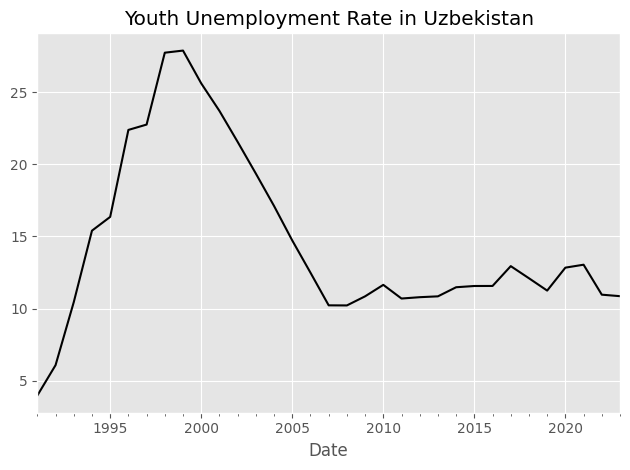

In [299]:
plt.style.use('ggplot')
df.rate.plot(alpha=1, color='black', title='Youth Unemployment Rate in Uzbekistan'); 
plt.tight_layout(); plt.show()

<Axes: xlabel='rate', ylabel='Count'>

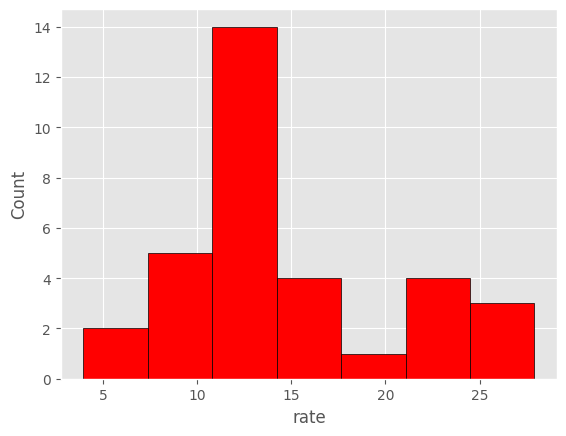

In [301]:
sns.histplot(df.rate, alpha=1.0, color='red', edgecolors='black')

In [307]:
# sns.displot(df.rate, kind='hist', aspect=2, color='blue', edgecolors='black')

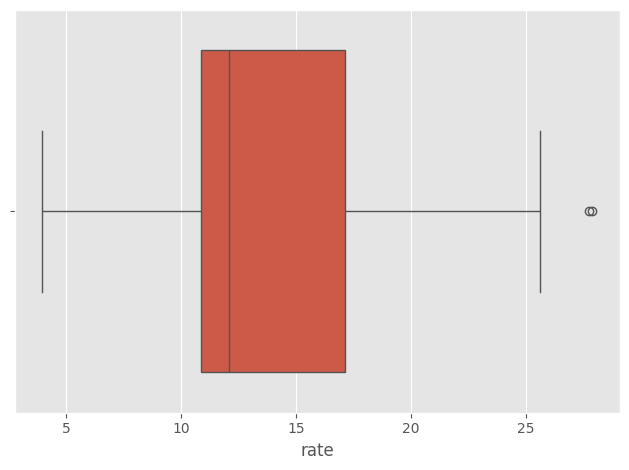

In [339]:
sns.boxplot(df.rate, orient='h', whis=1.5); plt.tight_layout()

In [351]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

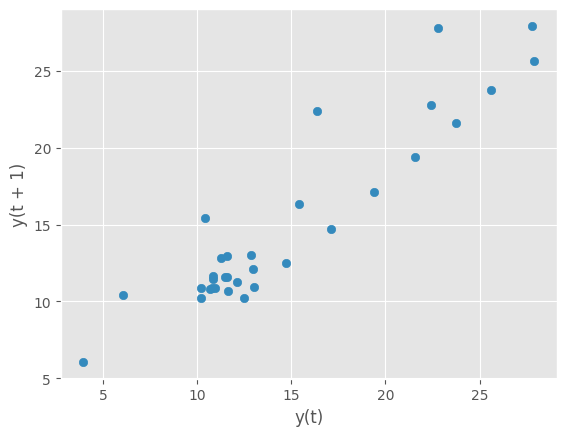

In [353]:
lag_plot(df.rate)

<Axes: xlabel='rate'>

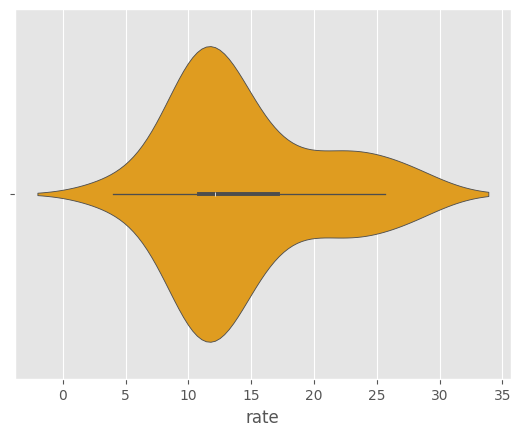

In [365]:
sns.violinplot(df.rate, orient='h', alpha=1, color='orange')

In [367]:
def iqr_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])  # Calculate the 25th and 75th percentiles
    IQR = q3 - q1  # Interquartile range
    lower_fence = q1 - (1.5 * IQR)  # Lower bound for outliers
    upper_fence = q3 + (1.5 * IQR)  # Upper bound for outliers
    return data[(data > upper_fence) | (data < lower_fence)] 

In [369]:
outliers = iqr_outliers(df.rate)
outliers

Date
1998-12-31    27.758
1999-12-31    27.905
Freq: YE-DEC, Name: rate, dtype: float64

In [378]:
def zscore(df, column_name, degree=3):
    data = df.copy()
    data['zscore'] = (data[column_name] - data[column_name].mean()) / data[column_name].std()
    outliers = data[(data['zscore'] <= -degree) | (data['zscore'] >= degree)]
    return outliers[column_name], data

In [384]:
threshold = 2
outliers, transformed = zscore(df, 'rate', threshold)

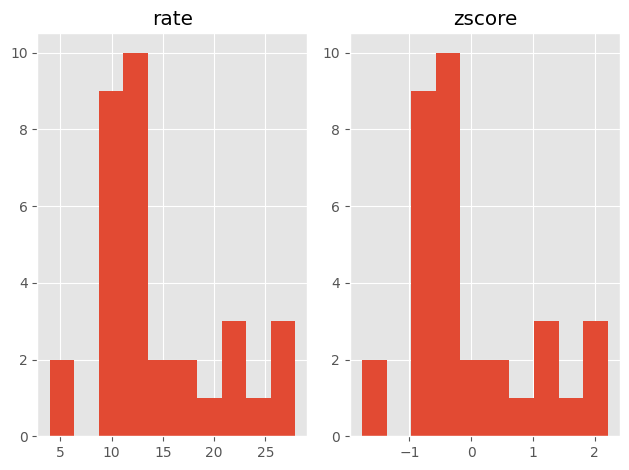

In [386]:
transformed[['rate', 'zscore']].hist(); plt.tight_layout()

In [388]:
def plot_zscore(data, d=3):
    n = len(data)
    plt.figure(figsize=(10, 6))
    plt.plot(data, 'k^')
    plt.plot([0, n], [d, d], 'r--')
    plt.plot([0, n], [-d, -d], 'r--')

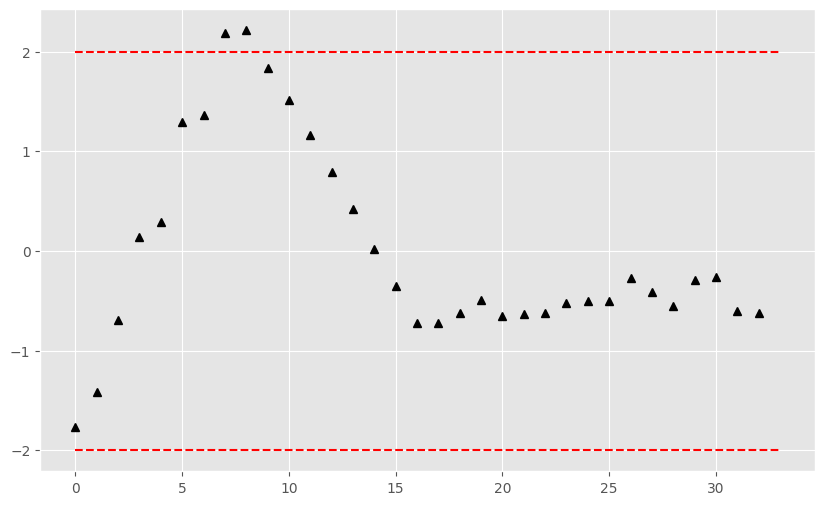

In [390]:
data = transformed['zscore'].values
plot_zscore(data, d=2)

In [392]:
def test_normal(df):
    t_test, p_value = kstest_normal(df)
    if p_value < 0.05:
        print('Reject null hypothesis. Data is not normally distributed')
    else:
        print('Fail to reject null hypothesis. Data is normally distributed')

In [394]:
test_normal(df.rate)

Reject null hypothesis. Data is not normally distributed


In [396]:
from numpy.random import normal, seed
from scipy.stats import norm

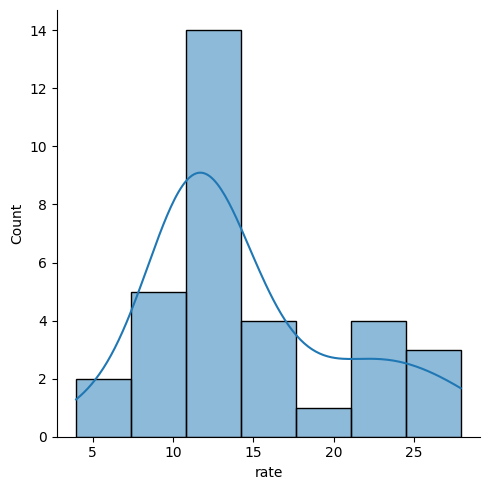

In [414]:
plt.style.use('default')
sns.displot(df.rate, kde=True); plt.tight_layout()

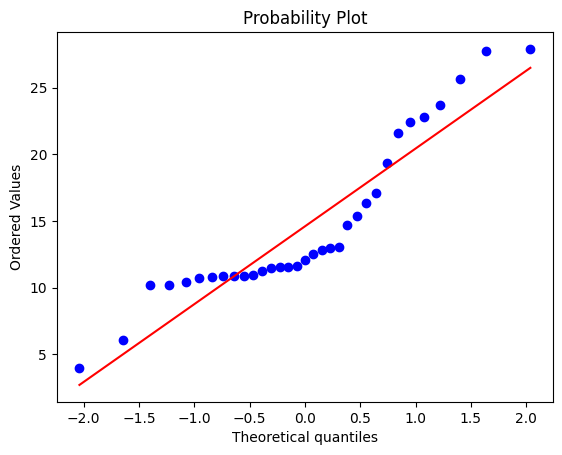

In [429]:
import scipy.stats
import pylab
scipy.stats.probplot(df.rate, plot=pylab)
plt.show()

In [431]:
print(outliers)

Date
1998-12-31    27.758
1999-12-31    27.905
Freq: YE-DEC, Name: rate, dtype: float64


# Train / Test

In [441]:
train, test = pm.model_selection.train_test_split(df, test_size=0.2)
print(train.shape)
print(test.shape)

(26, 1)
(7, 1)


# ADF & KPSS

In [447]:
def print_results(output, test='adf'):
    pval = output[1]
    test_score = output[0]
    lags = output[2]
    decision = 'Non-Stationary'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Stationary'
    elif test == 'kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Stationary'
    output_dict = {
        'Test Statistic': test_score, 
        'p-value': pval,
        'Numbers of lags': lags, 
        'decision': decision
    }

    for key, value in critical.items():
        output_dict['Critical Value (%s)' % key] = value

    return pd.Series(output_dict, name=test)

In [449]:
adf_output = adfuller(df.rate)
kpss_output = kpss(df.rate)

C:\Users\khali\AppData\Local\Temp\ipykernel_16540\2496907562.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_output = kpss(df.rate)


In [451]:
pd.concat([print_results(adf_output, 'adf'), print_results(kpss_output, 'kpss')], axis=1)

,adf,kpss
Test Statistic,-2.341205,0.263433
p-value,0.159022,0.1
Numbers of lags,9,3
decision,Non-Stationary,Stationary
Critical Value (1%),-3.752928,0.739
Critical Value (5%),-2.9985,0.463
Critical Value (10%),-2.638967,0.347
Critical Value (2.5%),NaN,0.574


In [457]:
adfuller(df.rate)

(-2.341205413646168,
 0.15902246578310314,
 9,
 23,
 {'1%': -3.7529275211638033,
  '5%': -2.998499866852963,
  '10%': -2.6389669754253307},
 58.37817709064578)

In [480]:
# df.rate.plot()

In [470]:
df1 = df.diff().dropna()

In [472]:
adfuller(df1)

(-4.440886172706503,
 0.0002510962513100378,
 8,
 23,
 {'1%': -3.7529275211638033,
  '5%': -2.998499866852963,
  '10%': -2.6389669754253307},
 62.62531208641262)

In [474]:
adf_output = adfuller(df1.rate)
kpss_output = kpss(df1.rate)

C:\Users\khali\AppData\Local\Temp\ipykernel_16540\4016519358.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_output = kpss(df1.rate)


In [476]:
pd.concat([print_results(adf_output, 'adf'), print_results(kpss_output, 'kpss')], axis=1)

,adf,kpss
Test Statistic,-4.440886,0.265381
p-value,0.000251,0.1
Numbers of lags,8,3
decision,Stationary,Stationary
Critical Value (1%),-3.752928,0.739
Critical Value (5%),-2.9985,0.463
Critical Value (10%),-2.638967,0.347
Critical Value (2.5%),NaN,0.574


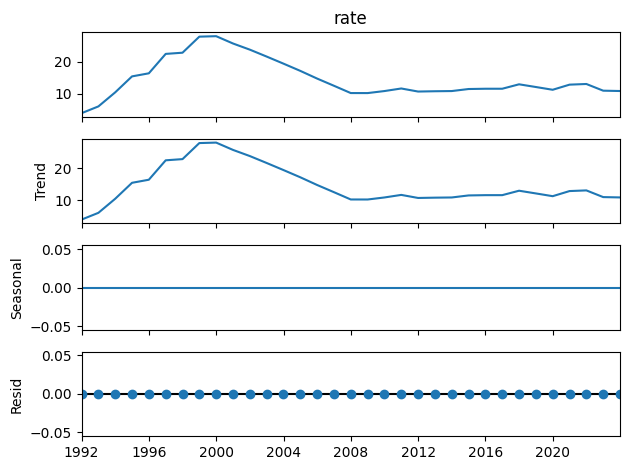

In [490]:
df_decomposed = seasonal_decompose(df.rate, model='additive')
df_decomposed.plot(); plt.show()

<Axes: xlabel='Date'>

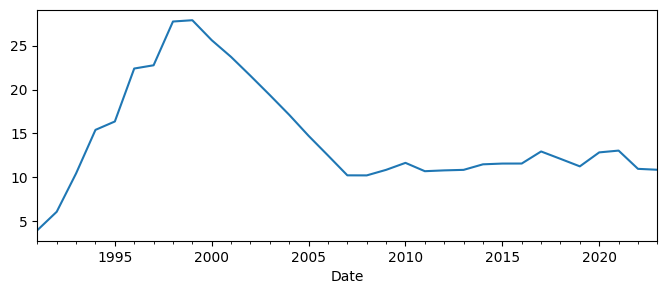

In [496]:
(df_decomposed.trend).plot(figsize=(8, 3))

In [504]:
# (df_decomposed.seasonal).plot(figsize=(8, 3))

In [502]:
# (df_decomposed.resid).plot(figsize=(8, 3))